# Proyek Diabetes Prediction

* Nama: Alif Khusain Bilfaqih
* Username: akbf_apotheosis
* Email: faqihkeren44@gmail.com



## Data Loading

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [29]:
url = 'https://raw.githubusercontent.com/faqihkeren44/diabetes/refs/heads/main/diabetes_prediction_dataset.csv'
main_df = pd.read_csv(url, sep=',')
main_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [30]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [31]:
describe_tabel = main_df.describe()
describe_tabel

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [32]:
dataset_md = main_df.to_markdown()
desribe_md = describe_tabel.to_markdown()

with open('dataset_df.md', 'w') as f:
    f.write(dataset_md)

with open('desribe_df.md', 'w') as f:
    f.write(desribe_md)

## Exploratory Data Analysis (EDA)

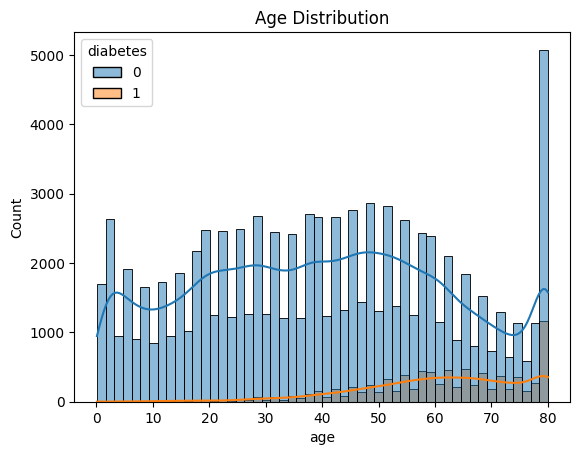

In [33]:
sns.histplot(data = main_df, x = main_df['age'], hue = main_df['diabetes'], kde = True)
plt.title('Age Distribution')
plt.savefig('vis_1.png')

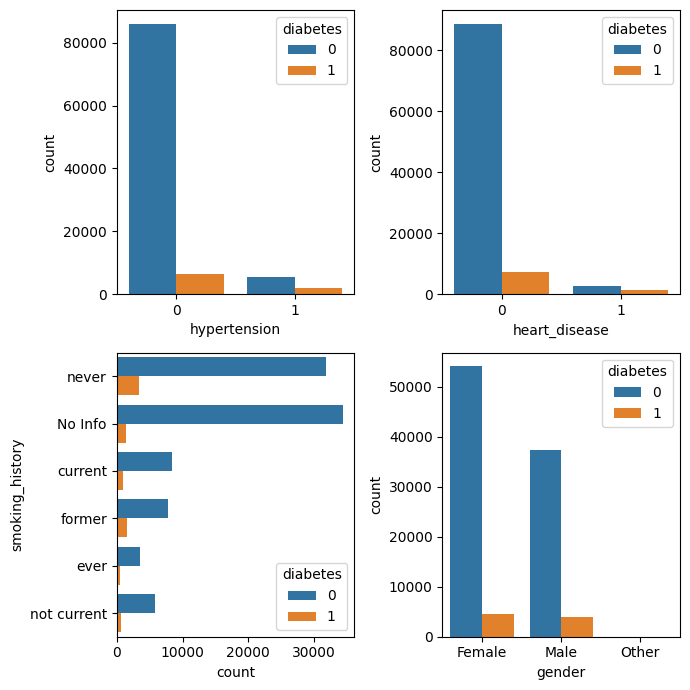

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7))
sns.countplot(data = main_df, x = 'hypertension', hue = 'diabetes', ax = ax[0, 0])
sns.countplot(data = main_df, x = 'heart_disease', hue = 'diabetes', ax = ax[0, 1])
sns.countplot(data = main_df, y = 'smoking_history', hue = 'diabetes', ax = ax[1, 0])
sns.countplot(data = main_df, x = 'gender', hue = 'diabetes', ax = ax[1, 1])
plt.tight_layout()
plt.savefig('vis_2.png')
plt.show()

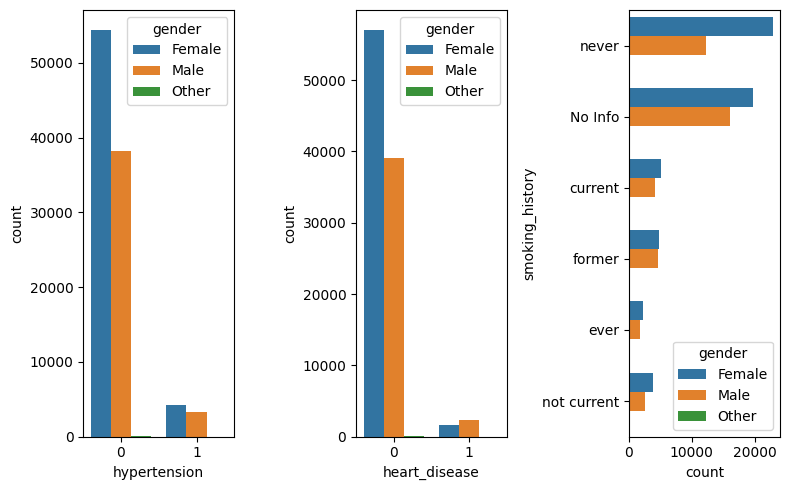

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(8, 5))
sns.countplot(data = main_df, x = 'hypertension', hue = 'gender', ax = ax[0])
sns.countplot(data = main_df, x = 'heart_disease', hue = 'gender', ax = ax[1])
sns.countplot(data = main_df, y = 'smoking_history', hue = 'gender', ax = ax[2])
plt.tight_layout()
plt.savefig('vis_3.png')
plt.show()

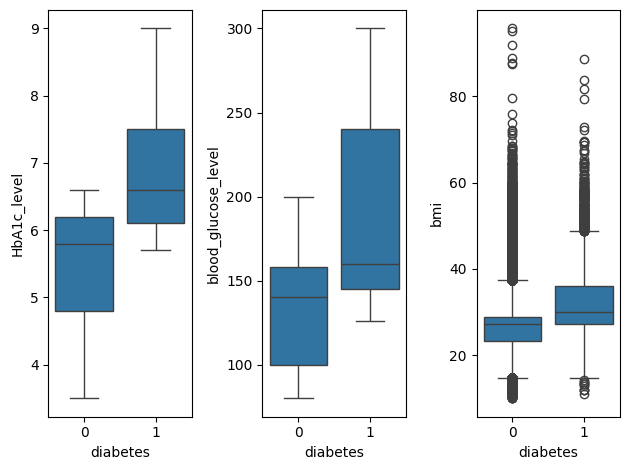

In [36]:
fig, ax = plt.subplots(1, 3)
sns.boxplot(x = main_df.diabetes, y = main_df.HbA1c_level, ax = ax[0])
sns.boxplot(x = main_df.diabetes, y = main_df.blood_glucose_level, ax = ax[1])
sns.boxplot(x = main_df.diabetes, y = main_df.bmi, ax = ax[2])
plt.tight_layout()
plt.savefig('vis_4.png')
plt.show()

## Data Preparation

In [37]:
main_df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [38]:
main_df.duplicated().sum()

3854

In [39]:
main_df.drop_duplicates(inplace=True)

In [40]:
main_df.gender.value_counts()

,count
gender,
Female,56161
Male,39967
Other,18


In [41]:
main_df = main_df[main_df.gender != 'Other']
main_df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [42]:
main_df['gender'] = main_df['gender'].astype('category')
main_df['gender_code'] = main_df['gender'].cat.codes

<ipython-input-42-833c2743a004>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['gender'] = main_df['gender'].astype('category')
<ipython-input-42-833c2743a004>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['gender_code'] = main_df['gender'].cat.codes


In [43]:
print('0 =', main_df.gender.cat.categories[0])
print('1 =', main_df.gender.cat.categories[1])

0 = Female
1 = Male


In [44]:
number_df = main_df.drop(['gender', 'smoking_history'], axis=1)
number_df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_code
0,80.0,0,1,25.19,6.6,140,0,0
1,54.0,0,0,27.32,6.6,80,0,0
2,28.0,0,0,27.32,5.7,158,0,1
3,36.0,0,0,23.45,5.0,155,0,0
4,76.0,1,1,20.14,4.8,155,0,1


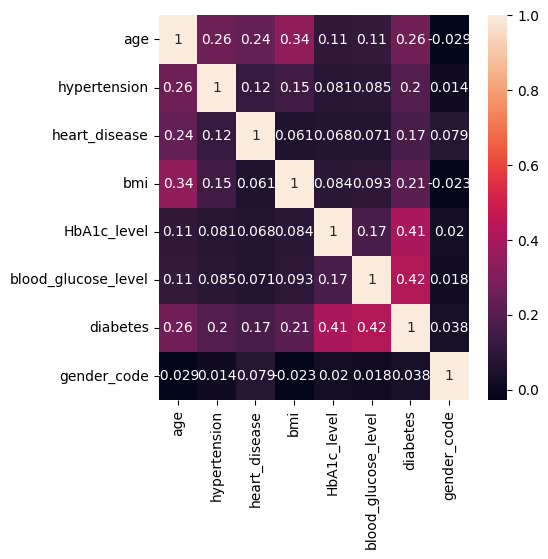

In [45]:
plt.figure(figsize=(5,5))
sns.heatmap(number_df.corr(), annot=True)
plt.show

plt.savefig('heatmap_corr.png')

In [46]:
corr = number_df.corr()['diabetes']. drop('diabetes')
top_features = corr[abs(corr) > 0.19].sort_values(ascending=False)
top_features = list(top_features.index)
top_features

['blood_glucose_level', 'HbA1c_level', 'age', 'bmi', 'hypertension']

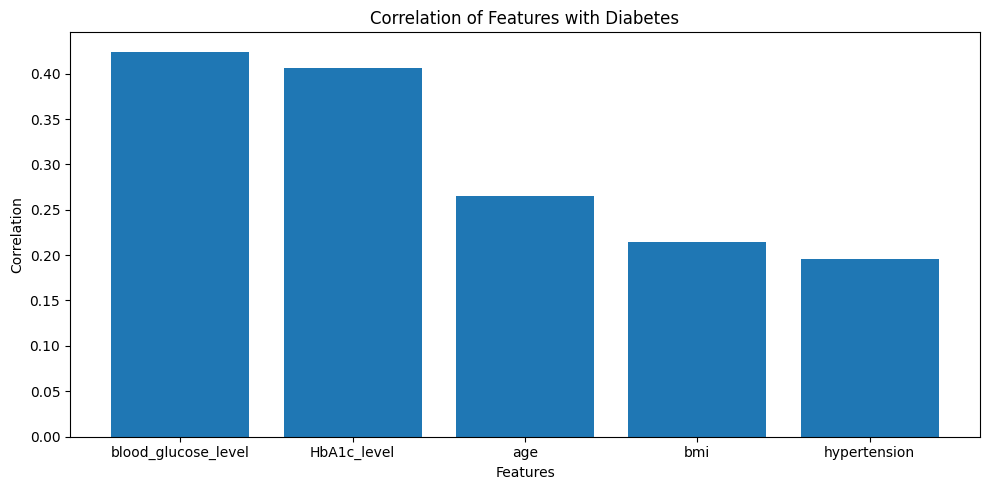

In [47]:
plt.figure(figsize=(10,5))
plt.bar(x=top_features, height=corr[top_features])
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation of Features with Diabetes')
plt.tight_layout()
plt.show()

In [48]:
final_df = main_df[['blood_glucose_level', 'HbA1c_level', 'age', 'bmi', 'diabetes']]
final_df.head()

,blood_glucose_level,HbA1c_level,age,bmi,diabetes
0,140,6.6,80.0,25.19,0
1,80,6.6,54.0,27.32,0
2,158,5.7,28.0,27.32,0
3,155,5.0,36.0,23.45,0
4,155,4.8,76.0,20.14,0


In [49]:
label = final_df[['blood_glucose_level', 'HbA1c_level', 'age', 'bmi']].values
target = final_df['diabetes'].values

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(label, target, test_size = 0.2)

## Modeling

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [52]:
models={'LogisticRegression':LogisticRegression(),
        'K-Nearest Neighbors':KNeighborsClassifier(),
        'Decision Tree':DecisionTreeClassifier(),
        'Support Vector Machine(Linear Kernel)':LinearSVC(),
        'Support Vector Machine(Non-Linear Kernal)':SVC(),
        'Neural Network':MLPClassifier(),
        'Random Forest':RandomForestClassifier(),
        'Gradient Boosting':GradientBoostingClassifier()
        }

In [53]:
for name, model in models.items():
    print(name)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

LogisticRegression
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17516
           1       0.88      0.62      0.73      1710

    accuracy                           0.96     19226
   macro avg       0.92      0.80      0.85     19226
weighted avg       0.96      0.96      0.96     19226

K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17516
           1       0.87      0.56      0.69      1710

    accuracy                           0.95     19226
   macro avg       0.92      0.78      0.83     19226
weighted avg       0.95      0.95      0.95     19226

Decision Tree
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17516
           1       0.73      0.74      0.73      1710

    accuracy                           0.95     19226
   macro avg       0.85      0.85      0.85     19226
weighted avg       0.

In [59]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 251, 50),
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'max_depth': np.arange(3, 8),
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist, n_iter=10,
                                   cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the model to the training data using RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best_random = best_model_random.predict(X_test)

# Evaluate the best model
accuracy_best_random = accuracy_score(y_test, y_pred_best_random)

## Akurasi

In [61]:
# Print the results
print("Best Parameters (Randomized Search):", best_params_random)
print(f"Best Model Accuracy (Randomized Search): {accuracy_best_random}")


Best Parameters (Randomized Search): {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.01}
Best Model Accuracy (Randomized Search): 0.9705086861541662


In [63]:
model_report = classification_report(y_test, y_pred_best_random)
print(model_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17516
           1       1.00      0.67      0.80      1710

    accuracy                           0.97     19226
   macro avg       0.98      0.83      0.89     19226
weighted avg       0.97      0.97      0.97     19226



In [64]:
with open('model_report.md', 'w') as f:
    f.write(model_report)

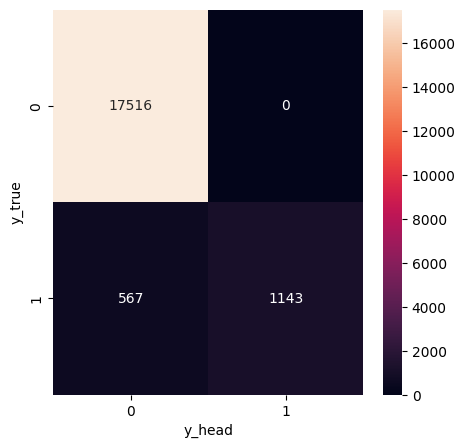

In [66]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_best_random), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.savefig('confusion_matrix.png')
plt.show()

In [68]:
import pickle
pickle.dump(best_model_random, open('model.pkl', 'wb'))